In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('../data/Lekagul Sensor Data.csv')

In [3]:
data

,Timestamp,car-id,car-type,gate-name
0,5/1/15 0:43,20154301124328-262,4,entrance3
1,5/1/15 1:03,20154301124328-262,4,general-gate1
2,5/1/15 1:06,20154301124328-262,4,ranger-stop2
3,5/1/15 1:09,20154301124328-262,4,ranger-stop0
4,5/1/15 1:12,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,5/31/16 23:40,20161031111001-854,6,ranger-stop2
171473,5/31/16 23:42,20165831105856-579,1,general-gate4
171474,5/31/16 23:43,20161031111001-854,6,general-gate1
171475,5/31/16 23:49,20165831105856-579,1,general-gate7


In [4]:
data.describe()

,Timestamp,car-id,car-type,gate-name
count,171477,171477,171477,171477
unique,123133,18708,7,40
top,7/30/15 11:54,20154519024544-322,1,general-gate7
freq,9,281,67698,16119


In [6]:
data['car-id'].unique()

array(['20154301124328-262', '20153101013141-937', '20155201025212-846',
       ..., '20164331104330-759', '20165831105856-579',
       '20161031111001-854'], dtype=object)

In [7]:
with open('car-id.txt', 'w') as f:
    for listitem in data['car-id'].unique():
        f.write('%s\n' % listitem)

In [5]:
data['gate-name'].unique()

array(['entrance3', 'general-gate1', 'ranger-stop2', 'ranger-stop0',
       'general-gate2', 'general-gate5', 'entrance4', 'entrance1',
       'general-gate7', 'general-gate4', 'entrance2', 'camping6',
       'camping2', 'camping3', 'ranger-base', 'gate8', 'camping0',
       'gate3', 'ranger-stop3', 'camping8', 'general-gate3',
       'general-gate6', 'gate4', 'camping7', 'ranger-stop5', 'gate5',
       'ranger-stop6', 'entrance0', 'camping5', 'ranger-stop4', 'gate6',
       'gate7', 'ranger-stop7', 'camping4', 'gate2', 'ranger-stop1',
       'general-gate0', 'camping1', 'gate1', 'gate0'], dtype=object)

In [6]:
#Took the date element out 
data['Date'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%y %H:%M')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%y %H:%M')
data['day'] = data['Date'].round('D')
data['hours'] = pd.to_datetime(data['Date'].round('H')).dt.time
data['minute'] = pd.to_datetime(data['Date'].round('min')).dt.time

data = data.set_index('Timestamp')[['car-id','car-type', 'gate-name','Date','day','hours', 'minute']]

In [7]:
data

,car-id,car-type,gate-name,Date,day,hours,minute
Timestamp,,,,,,,
2015-05-01 00:43:00,20154301124328-262,4,entrance3,2015-05-01 00:43:00,2015-05-01,01:00:00,00:43:00
2015-05-01 01:03:00,20154301124328-262,4,general-gate1,2015-05-01 01:03:00,2015-05-01,01:00:00,01:03:00
2015-05-01 01:06:00,20154301124328-262,4,ranger-stop2,2015-05-01 01:06:00,2015-05-01,01:00:00,01:06:00
2015-05-01 01:09:00,20154301124328-262,4,ranger-stop0,2015-05-01 01:09:00,2015-05-01,01:00:00,01:09:00
2015-05-01 01:12:00,20154301124328-262,4,general-gate2,2015-05-01 01:12:00,2015-05-01,01:00:00,01:12:00
...,...,...,...,...,...,...,...
2016-05-31 23:40:00,20161031111001-854,6,ranger-stop2,2016-05-31 23:40:00,2016-06-01,00:00:00,23:40:00
2016-05-31 23:42:00,20165831105856-579,1,general-gate4,2016-05-31 23:42:00,2016-06-01,00:00:00,23:42:00
2016-05-31 23:43:00,20161031111001-854,6,general-gate1,2016-05-31 23:43:00,2016-06-01,00:00:00,23:43:00


In [8]:
#Calculate unique count of cars for each day
data_count_id_unqiue = data.groupby('day')['car-id'].nunique()
#Calculate total number of car-detection for each day
data_count_id = data.groupby('day')['car-id'].count()

Text(0, 0.5, 'count of unique id')

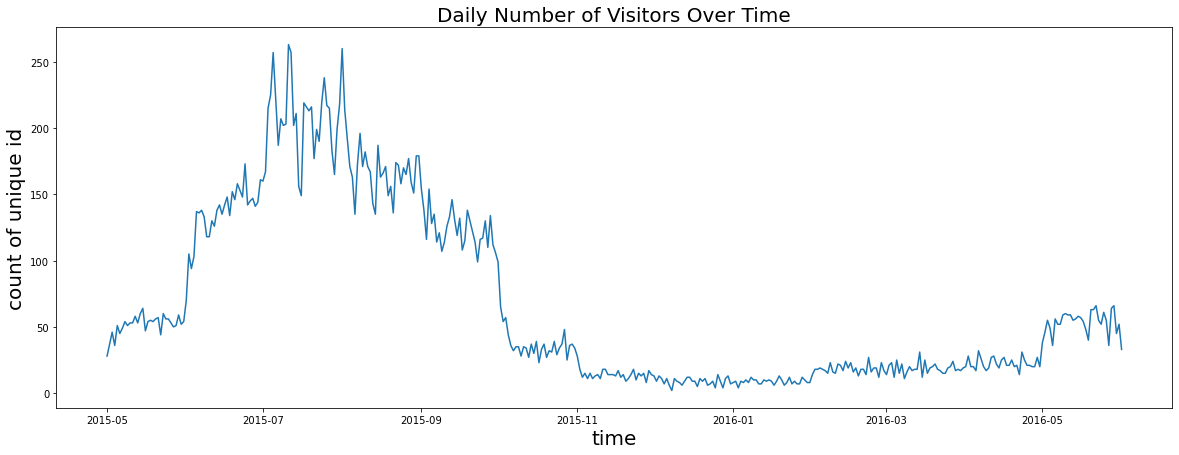

In [9]:
fig = plt.figure()
fig.set_size_inches(20, 7)

ax = plt.axes()
#ax.plot(data_count_id)
ax.plot(data_count_id_unqiue)

plt.title('Daily Number of Visitors Over Time', fontsize=20)
plt.xlabel('time', fontsize=20)
plt.ylabel('count of unique id', fontsize=20)

In [10]:
#Filter out cars that violate the rule 
unpermitted = data[(data['car-type']!='2P') & (data['gate-name'].str.startswith('gate'))]
unpermitted

,car-id,car-type,gate-name,Date,day,hours,minute
Timestamp,,,,,,,
2015-05-05 02:07:00,20150505020522-625,4,gate6,2015-05-05 02:07:00,2015-05-05,02:00:00,02:07:00
2015-05-05 02:09:00,20150505020522-625,4,gate5,2015-05-05 02:09:00,2015-05-05,02:00:00,02:09:00
2015-05-05 02:22:00,20150505020522-625,4,gate3,2015-05-05 02:22:00,2015-05-05,02:00:00,02:22:00
2015-05-05 02:40:00,20150505020522-625,4,gate3,2015-05-05 02:40:00,2015-05-05,03:00:00,02:40:00
2015-05-05 02:53:00,20150505020522-625,4,gate5,2015-05-05 02:53:00,2015-05-05,03:00:00,02:53:00
...,...,...,...,...,...,...,...
2016-05-31 02:49:00,20164531024545-131,4,gate5,2016-05-31 02:49:00,2016-05-31,03:00:00,02:49:00
2016-05-31 03:02:00,20164531024545-131,4,gate3,2016-05-31 03:02:00,2016-05-31,03:00:00,03:02:00
2016-05-31 03:20:00,20164531024545-131,4,gate3,2016-05-31 03:20:00,2016-05-31,03:00:00,03:20:00


In [11]:
unpermitted['car-id'].unique()

array(['20150505020522-625', '20151521021518-235', '20154702044723-914',
       '20150416040441-902', '20152925022919-735', '20154907044911-419',
       '20151414041406-386', '20153923043910-954', '20150104020118-228',
       '20151520021556-881', '20154901044910-777', '20151415031450-923',
       '20151201031245-77', '20150920030917-854', '20151112031119-409',
       '20155201025245-696', '20152824032830-251', '20162219032229-226',
       '20163016033037-38', '20162401032410-101', '20165003035005-470',
       '20162419042411-322', '20164531024545-131'], dtype=object)

In [12]:
unpermitted

,car-id,car-type,gate-name,Date,day,hours,minute
Timestamp,,,,,,,
2015-05-05 02:07:00,20150505020522-625,4,gate6,2015-05-05 02:07:00,2015-05-05,02:00:00,02:07:00
2015-05-05 02:09:00,20150505020522-625,4,gate5,2015-05-05 02:09:00,2015-05-05,02:00:00,02:09:00
2015-05-05 02:22:00,20150505020522-625,4,gate3,2015-05-05 02:22:00,2015-05-05,02:00:00,02:22:00
2015-05-05 02:40:00,20150505020522-625,4,gate3,2015-05-05 02:40:00,2015-05-05,03:00:00,02:40:00
2015-05-05 02:53:00,20150505020522-625,4,gate5,2015-05-05 02:53:00,2015-05-05,03:00:00,02:53:00
...,...,...,...,...,...,...,...
2016-05-31 02:49:00,20164531024545-131,4,gate5,2016-05-31 02:49:00,2016-05-31,03:00:00,02:49:00
2016-05-31 03:02:00,20164531024545-131,4,gate3,2016-05-31 03:02:00,2016-05-31,03:00:00,03:02:00
2016-05-31 03:20:00,20164531024545-131,4,gate3,2016-05-31 03:20:00,2016-05-31,03:00:00,03:20:00


In [13]:
unpermitted.groupby('car-id').count().head(5)

,car-type,gate-name,Date,day,hours,minute
car-id,,,,,,
20150104020118-228,6,6,6,6,6,6
20150416040441-902,6,6,6,6,6,6
20150505020522-625,6,6,6,6,6,6
20150920030917-854,6,6,6,6,6,6
20151112031119-409,6,6,6,6,6,6


In [14]:
unpermitted_one_car = pd.DataFrame(unpermitted[unpermitted['car-id'] == unpermitted['car-id'].unique()[1]])

In [15]:
car_timeline = pd.DataFrame
car_timeline.columns = ['car-id', 'stop1', 'stop2', 'stop3','stop4','stop5','stop6']
car_timeline = unpermitted_one_car

In [16]:
unpermitted_one_car 

AttributeError: 'list' object has no attribute 'format'

AttributeError: 'list' object has no attribute 'name'

In [17]:
#Violation time 
vio_time = pd.DataFrame(unpermitted.groupby('hours')['car-id'].nunique())
vio_time.reset_index(inplace=True)
vio_time

KeyError: 'hours'

In [ ]:
#Bar plot for violation sequence by time
vio_time.plot(kind='bar')

plt.title('Count of Violators', fontsize=15)
plt.xlabel('Time(am)', fontsize=15)
plt.ylabel('Count of car', fontsize=15)

In [ ]:
#Count of unqiue car id of unpermitted cars for each day 
data_count_id_unpermitted = unpermitted.groupby('day')['car-id'].nunique()
data_count_id_unpermitted

In [ ]:
#Plot of count of unqiue car id of unpermitted cars for each day;
#All are one. 
fig = plt.figure()
fig.set_size_inches(20, 7)

ax = plt.axes()
ax.plot(data_count_id_unpermitted)

In [ ]:
#Calculate stay time for each car id
stay_time = pd.DataFrame(data.groupby('car-id').last()['Date']-data.groupby('car-id').first()['Date'])
stay_time['hours'] = round(stay_time.astype('timedelta64[m]')/60 , 3)
stay_time = pd.DataFrame(stay_time['hours'])

In [ ]:
stay_time.sort_values(by=['hours'],ascending=False)

In [ ]:
#stay_time['log_hours'] = np.sqrt(stay_time['hours'])

In [ ]:
stay_time

In [ ]:
#The box plot shows that there are two siginificant outlier in stay time; Hypothesis #3
stay_time.plot.box()
plt.title('stay time for each car id')

In [ ]:
#Calculate count of visit for each car id
visit_freq = pd.DataFrame(data.groupby('car-id')['Date'].count())
visit_freq.sort_values(by=['Date'],ascending=False)

In [ ]:
visit_freq.plot.box()
plt.title("count of visit for each car id")

In [ ]:
visit_freq.to_csv('/Users/zeyuchang/Desktop/SP21/Comp 152/152 Final Project/MC1/visit_freq.csv',index=True)

In [ ]:
stay_time.to_csv('/Users/zeyuchang/Desktop/SP21/Comp 152/152 Final Project/MC1/stay_time.csv', index=True)

In [ ]:
data.to_csv('/Users/zeyuchang/Desktop/SP21/Comp 152/152 Final Project/MC1/data.csv', index=True)